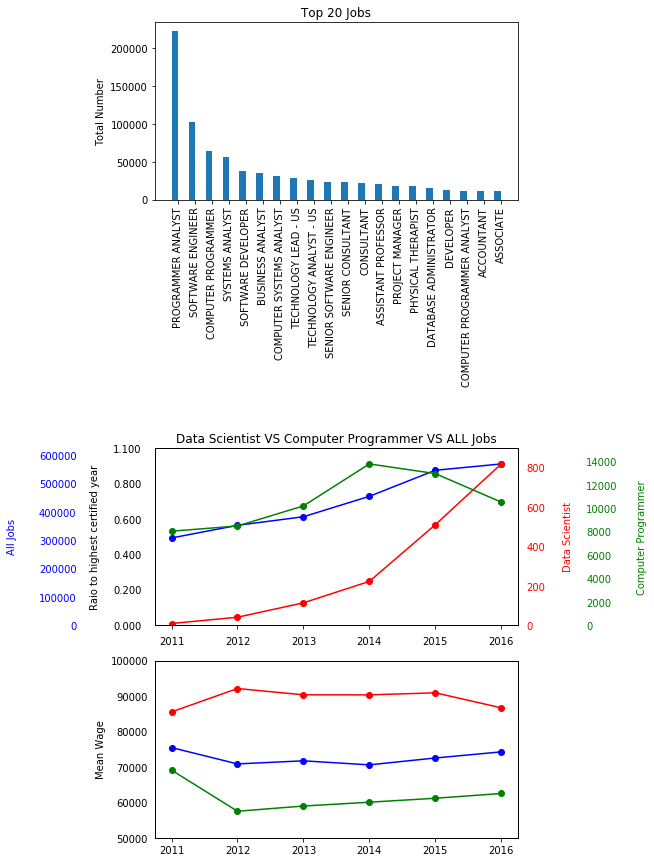

In [2]:
# PLOT 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import plotly.plotly as py
from scipy.optimize import curve_fit

df=pd.read_csv('h1b.csv')
df_certified=df[(df['CASE_STATUS']=='CERTIFIED')]


# data scientist

ser=df_certified[(df_certified['JOB_TITLE']=='DATA SCIENTIST')].groupby(['JOB_TITLE','YEAR']).size()
df_ds=ser.to_frame()
df_ds.reset_index(inplace=True)
df_ds.columns= ['job','year','value']

# computer programmer

ser=df_certified[(df_certified['JOB_TITLE']=='COMPUTER PROGRAMMER')].groupby(['JOB_TITLE','YEAR']).size()
df_cp=ser.to_frame()
df_cp.reset_index(inplace=True)
df_cp.columns= ['job','year','value']


# all jobs
all_year_size=df_certified.groupby(['YEAR']).size()

# top 20 job
df_certified.groupby(['JOB_TITLE']).size().nlargest(20)


# plot

# industry general bar chart
fig = plt.figure(figsize=(6.5,15))
#plt.figure(figsize=(50,50))

ax=fig.add_subplot(4,1,1)

series=df_certified.groupby(['JOB_TITLE']).size().nlargest(20)
ind = np.arange(20)
width = 0.4
ax.bar(ind,series,width)
ax.set_ylabel('Total Number')
ax.set_title('Top 20 Jobs')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(series.index, minor=False, rotation=90)



# comparison between ds and cp number

ax1 = fig.add_subplot(4,1,3)
ax1.plot(all_year_size.index, all_year_size,'-o', c='b')
ax1.set_ylim([0,626610.6])
ax1.set_ylabel('All Jobs', color='b')
ax1.tick_params(axis='both', which='major', pad=8)
for t in ax1.get_yticklabels():
    t.set_color('b')

ax2 = ax1.twinx()
ax2.plot(df_ds['year'], df_ds['value'],'-o', c='r')
ax2.set_ylim([0,900.9])
ax2.set_ylabel('Data Scientist', color='r')
ax2.tick_params(axis='both', which='major', pad=5)
for tl in ax2.get_yticklabels():
    tl.set_color('r')

ax3 = ax1.twinx()
ax3.plot(df_cp['year'], df_cp['value'],'-o', c='g')
ax3.set_ylim([0,15175.6])
ax3.set_ylabel('Computer Programmer', color='g')
ax3.tick_params(axis='y', which='major', pad=65)
for t in ax3.get_yticklabels():
    t.set_color('g')


ax4 = ax1.twinx()
Y = all_year_size
def tick_function(Y):
    V = Y/569646   
    return ["%.3f" % z for z in V]
new_tick_locations = np.array([0,569646*0.2, 569646*0.4, 569646*0.6, 569646*0.8,626610.6])
ax4.set_yticklabels(tick_function(new_tick_locations))
ax4.set_ylabel(r"Raio to highest certified year")
ax4.yaxis.tick_left()

ax1.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='off',      # ticks along the bottom edge are off
    right='off',         # ticks along the top edge are off
    labelbottom='off')

ax2.tick_params(
    axis='y',          # changes apply to the y-axis
    which='both',      # both major and minor ticks are affected
    left='off',      # ticks along the bottom edge are off
    right='off',         # ticks along the top edge are off
    labelbottom='off')

ax3.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='off',      # ticks along the bottom edge are off
    right='off',         # ticks along the top edge are off
    labelbottom='off')
ax4.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='off',      # ticks along the bottom edge are off
    right='off',         # ticks along the top edge are off
    labelbottom='off')
ax1.yaxis.set_label_coords(-0.38,0.5)
ax2.yaxis.set_label_coords(1.125,0.5)
ax3.yaxis.set_label_coords(1.33,0.5)
ax4.yaxis.set_label_coords(-0.18,0.5)

ax1.tick_params(axis='y', which='major', pad=75)
ax4.tick_params(axis='y', which='major', pad=10)
ax1.set_title('Data Scientist VS Computer Programmer VS ALL Jobs' )


# comparison between ds and cp wages

all_year_wage=df_certified.groupby(['YEAR']).agg({'PREVAILING_WAGE':['mean']})
#plt.scatter(all_year_wage.index, all_year_wage)

df_ds_wage=df_certified[(df_certified['JOB_TITLE']=='DATA SCIENTIST')].groupby(['JOB_TITLE','YEAR']).agg({'PREVAILING_WAGE':['mean']})
df_ds_wage.reset_index(inplace=True)
df_ds_wage.columns = ['job','year','value']
#df_ds_wage.plot(kind='scatter',x='year',y='value')

df_cp_wage=df_certified[(df_certified['JOB_TITLE']=='COMPUTER PROGRAMMER')].groupby(['JOB_TITLE','YEAR']).agg({'PREVAILING_WAGE':['mean']})
df_cp_wage.reset_index(inplace=True)
df_cp_wage.columns = ['job','year','value']

# wage plot

ax5 = fig.add_subplot(4,1,4)
ax5.plot(all_year_wage.index, all_year_wage,'-o', c='b')
ax5.set_ylim([50000,100000])
ax5.set_ylabel('Mean Wage', color='black')
for t in ax5.get_yticklabels():
    t.set_color('black')

ax6 = ax5.twinx()
ax6.plot(df_ds_wage['year'], df_ds_wage['value'],'-o', c='r')
ax6.set_ylim([50000,100000])
#ax6.set_ylabel('Data Scientist', color='r')
#ax6.tick_params(axis='both', which='major', pad=5)
ax6.set_yticklabels([])

ax7 = ax5.twinx()
ax7.plot(df_cp_wage['year'], df_cp_wage['value'],'-o', c='g')
ax7.set_ylim([50000,100000])
#ax7.set_ylabel('Computer Programmer', color='g')
#ax7.tick_params(axis='both', which='major', pad=65)
ax7.set_yticklabels([])

ax5.tick_params(
    axis='y',          # changes apply to the y-axis
    which='both',      # both major and minor ticks are affected
    left='off',      # ticks along the bottom edge are off
    right='off',         # ticks along the top edge are off
    labelbottom='off')

ax6.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='off',      # ticks along the bottom edge are off
    right='off',         # ticks along the top edge are off
    labelbottom='off')
ax7.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='off',      # ticks along the bottom edge are off
    right='off',         # ticks along the top edge are off
    labelbottom='off')

plt.show() 